# What makes people happy? Can you find Dytopia?

The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last year’s, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

<img src="https://allthatsinteresting.com/wordpress/wp-content/uploads/2016/03/giphy-4.gif" width="700px">

**Dataset information**

    The information in the datasets is based on answers to the most life evaluation address inquired within the survey. This address, known as the Cantril step, asks respondents to think of a step with the most excellent conceivable life for them being a 10 and the most exceedingly bad conceivable life being a and to rate their claim current lives on that scale.


The Happiness Score is explained by the following factors:

- `Overall rank`: happiness rank of the different countries
- `Country o region`
- `Score`:  is a national average of the responses to the main life evaluation question asked in the Gallup World Poll (GWP), which uses the Cantril Ladder. Ranges from [0-10]
- `GDP per capita`
- `Healthy Life Expectancy`: score that goes from [0-1], being 1 the ones that have more confidence in terms of healthy life
- `Social support`: it indicates how people are appreciating the social support by governments, and it that ranges from [0-2]
- `Freedom to make life choices` score that ranges from 0 to 1, being 1 the ones that feel more free
- `Generosity`:score that ranges from 0 to 1, being 1 the ones that feel more generosity
- `Perceptions of corruption`: perception of corruption on the country that it goes from  0 to 1. The higher this value is the lower perception of corruption
- `year`  


>dataset: `Ex2.2._Happiness-Score.csv`

In [116]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio

pio.renderers.default = 'colab'

import warnings
warnings.filterwarnings('ignore')

In [117]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [118]:
df1 = pd.read_csv(r"..\..\datasets\Students_turn\Ex2.2._Happiness-Score.csv")

In [119]:
df2 = pd.read_excel(r"..\..\datasets\Students_turn\WHR25_Data_Figure_2.1 (1).xlsx")

### Exercise 1.Tell a story with your dataset, to try to answer the following question:

>"Which factors are more important to live a happier life? As a result, people and countries can focus on the more significant factors to achieve a higher happiness level "

To achieve this goal, use the different funcionalities from the visualization libraries that you have seen in the module.

In [120]:
df2.columns

Index(['Year', 'Rank', 'Country name', 'Ladder score', 'upperwhisker',
       'lowerwhisker', 'Explained by: Log GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [121]:
df2.rename(columns={'Country name': 'Country or region'}, inplace=True)

In [122]:
df2.rename(columns={'Ladder score': 'Score'}, inplace=True)

In [123]:
df2.rename(columns={'Explained by: Log GDP per capita': 'GDP per capita'}, inplace=True)

In [124]:
df2.rename(columns={'Explained by: Social support': 'Social support'}, inplace=True)

In [125]:
df2.rename(columns={'Explained by: Perceptions of corruption': 'Perceptions of corruption'}, inplace=True)

In [126]:
df2.rename(columns={'Explained by: Freedom to make life choices': 'Freedom to make life choices'}, inplace=True)

In [127]:
df2.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)

In [128]:
df2.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)

In [129]:
df2.drop('Explained by: Healthy life expectancy', axis=1, inplace=True)

In [130]:
df2.drop('Rank', axis=1, inplace=True)

In [131]:
df2.drop('upperwhisker', axis=1, inplace=True)

In [132]:
df2.drop('lowerwhisker', axis=1, inplace=True)

In [133]:
df2.drop('Dystopia + residual', axis=1, inplace=True)

In [134]:
df2.columns

Index(['Year', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [135]:
df_2024=df2[df2['Year']==2024]

In [136]:
df=df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


In [137]:
df.drop('Unnamed: 0.1', axis=1, inplace=True)

In [138]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [139]:
df.drop('Overall rank', axis=1, inplace=True)

In [140]:
df.drop('Healthy life expectancy', axis=1, inplace=True)

In [141]:
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [142]:
df.head()

,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


In [143]:
df

,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018
...,...,...,...,...,...,...,...,...
307,Rwanda,3.334,0.359,0.711,0.555,0.217,0.411,2019
308,Tanzania,3.231,0.476,0.885,0.417,0.276,0.147,2019
309,Afghanistan,3.203,0.350,0.517,0.000,0.158,0.025,2019
310,Central African Republic,3.083,0.026,0.000,0.225,0.235,0.035,2019


In [144]:
df.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'year'],
      dtype='object')

In [145]:
df.isnull().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
year                            0
dtype: int64

In [146]:
df.fillna({'Perceptions of corruption':df['Perceptions of corruption'].mean()}, inplace=True)
df.isnull().sum()

Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
year                            0
dtype: int64

In [147]:
df.head()

,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


In [148]:
df.rename(columns={'year': 'Year'}, inplace=True)
df.head()

,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.632,1.305,1.592,0.681,0.202,0.393,2018
1,Norway,7.594,1.456,1.582,0.686,0.286,0.340,2018
2,Denmark,7.555,1.351,1.590,0.683,0.284,0.408,2018
3,Iceland,7.495,1.343,1.644,0.677,0.353,0.138,2018
4,Switzerland,7.487,1.420,1.549,0.660,0.256,0.357,2018


In [149]:
df.Year.value_counts()

Year
2018    156
2019    156
Name: count, dtype: int64

In [150]:
df_2018=df[df['Year']==2018]

In [151]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 1956
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          147 non-null    int64  
 1   Country or region             147 non-null    object 
 2   Score                         147 non-null    float64
 3   GDP per capita                147 non-null    float64
 4   Social support                147 non-null    float64
 5   Freedom to make life choices  146 non-null    float64
 6   Generosity                    147 non-null    float64
 7   Perceptions of corruption     146 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.3+ KB


In [152]:
df_2024.rename(columns={'Country name': 'Country or region'}, inplace=True)
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [153]:
df_2024.rename(columns={'Ladder score': 'Score'}, inplace=True)
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [154]:
df_2024.rename(columns={'Explained by: Log GDP per capita': 'GDP per capita'}, inplace=True)
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [155]:
df_2024.rename(columns={'Explained by: Social support': 'Social support'}, inplace=True)
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [156]:
df_2024.rename(columns={'Explained by: Generosity': 'Generosity'}, inplace=True)
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [157]:
df_2024.rename(columns={'Explained by: Freedom to make life choices': 'Freedom to make life choices'}, inplace=True)
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [158]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 1956
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          147 non-null    int64  
 1   Country or region             147 non-null    object 
 2   Score                         147 non-null    float64
 3   GDP per capita                147 non-null    float64
 4   Social support                147 non-null    float64
 5   Freedom to make life choices  146 non-null    float64
 6   Generosity                    147 non-null    float64
 7   Perceptions of corruption     146 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.3+ KB


In [159]:
df_2024.head()

,Year,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,2024,Finland,7.736,1.749,1.783,0.986,0.110,0.502
13,2024,Denmark,7.521,1.825,1.748,0.955,0.150,0.488
26,2024,Iceland,7.515,1.799,1.840,0.971,0.201,0.173
45,2024,Sweden,7.345,1.783,1.698,0.952,0.170,0.467
58,2024,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344


In [160]:
df_2018.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')

In [161]:
df_2024.columns

Index(['Year', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [162]:
new_order = ['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year']

In [163]:
df_2024_reordered = df_2024[new_order]

In [164]:
df_2024=df_2024_reordered
df_2024.head()

,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Finland,7.736,1.749,1.783,0.986,0.110,0.502,2024
13,Denmark,7.521,1.825,1.748,0.955,0.150,0.488,2024
26,Iceland,7.515,1.799,1.840,0.971,0.201,0.173,2024
45,Sweden,7.345,1.783,1.698,0.952,0.170,0.467,2024
58,Netherlands,7.306,1.822,1.667,0.860,0.186,0.344,2024


In [165]:
numeric_only_2024=df_2024.select_dtypes(include='number')

In [166]:
numeric_only_2018=df_2018.select_dtypes(include='number')

In [167]:
df_2024_corr=numeric_only_2024.corr()
df_2024_corr

,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Score,1.000000,0.763269,0.812122,0.634400,0.054351,0.412457,NaN
GDP per capita,0.763269,1.000000,0.709762,0.381369,-0.072993,0.384901,NaN
Social support,0.812122,0.709762,1.000000,0.448095,0.004289,0.217215,NaN
Freedom to make life choices,0.634400,0.381369,0.448095,1.000000,0.187788,0.314872,NaN
Generosity,0.054351,-0.072993,0.004289,0.187788,1.000000,0.192828,NaN
Perceptions of corruption,0.412457,0.384901,0.217215,0.314872,0.192828,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
df_2018_corr=numeric_only_2018.corr()
df_2018_corr

,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year
Score,1.000000,0.802124,0.745760,0.544280,0.135825,0.403175,NaN
GDP per capita,0.802124,1.000000,0.672080,0.332275,-0.011241,0.309481,NaN
Social support,0.745760,0.672080,1.000000,0.411087,0.018226,0.216945,NaN
Freedom to make life choices,0.544280,0.332275,0.411087,1.000000,0.297988,0.460837,NaN
Generosity,0.135825,-0.011241,0.018226,0.297988,1.000000,0.362243,NaN
Perceptions of corruption,0.403175,0.309481,0.216945,0.460837,0.362243,1.000000,NaN
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [169]:
list_happy_2018=list(df_2018.sort_values(by='Score', ascending=False).head(52)['Country or region'])

In [170]:
list_happy_2024=list(df_2024.sort_values(by='Score', ascending=False).head(52)['Country or region'])

In [171]:
list_sad_2018=list(df_2018.sort_values(by='Score', ascending=False).tail(52)['Country or region'])

In [172]:
list_sad_2024=list(df_2024.sort_values(by='Score', ascending=False).tail(52)['Country or region'])

In [173]:
list_middle_2018=list(df_2018[(df_2018['Score']<5.945)&(df_2018['Score']>4.724)].sort_values(by='Score', ascending= False)['Country or region'])

In [174]:
list_middle_2024=list(df_2024[(df_2024['Score']<6.197)&(df_2024['Score']>5.190)].sort_values(by='Score', ascending= False)['Country or region'])

In [175]:
def assign_group(country):
    if country in list_happy_2018:
        return 'High score of happiness'
    elif country in list_sad_2018:
        return 'Low score of happiness'
    else:
        return 'Middle score of happiness'

df_2018['Group'] = df_2018['Country or region'].apply(assign_group)

In [176]:
def assign_group(country):
    if country in list_happy_2024:
        return 'High score of happiness'
    elif country in list_sad_2024:
        return 'Low score of happiness'
    else:
        return 'Middle score of happiness'

df_2024['Group'] = df_2024['Country or region'].apply(assign_group)

In [177]:
happiest_countries_2018=df_2018.sort_values(by='Score', ascending=False).head(52)

In [178]:
happiest_countries_2024=df_2024.sort_values(by='Score', ascending=False).head(52)

In [179]:
saddest_countries_2018=df_2018.sort_values(by='Score', ascending=False).tail(52)

In [180]:
saddest_countries_2024=df_2024.sort_values(by='Score', ascending=False).tail(52)

In [181]:
middle_countries_2018=df_2018[(df_2018['Score']<5.945)&(df_2018['Score']>4.724)].sort_values(by='Score', ascending= False)

In [182]:
middle_countries_2024=df_2024[(df_2024['Score']<6.197)&(df_2024['Score']>5.190)].sort_values(by='Score', ascending= False)
middle_countries_2024.head()

,Country or region,Score,GDP per capita,Social support,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Group
696,Uzbekistan,6.193,1.179,1.615,0.977,0.195,0.208,2024,Middle score of happiness
709,Paraguay,6.172,1.329,1.615,0.921,0.097,0.063,2024,Middle score of happiness
722,Japan,6.147,1.678,1.550,0.746,0.014,0.200,2024,Middle score of happiness
735,Bosnia and Herzegovina,6.136,1.405,1.545,0.749,0.178,0.009,2024,Middle score of happiness
748,Philippines,6.107,1.177,1.385,0.966,0.075,0.110,2024,Middle score of happiness


In [183]:
len(df_2024)

147

In [184]:
len(list_happy_2024)

52

In [185]:
def assign_group(country):
    if country in list_happy_2018:
        return 'High score of happiness'
    elif country in list_sad_2018:
        return 'Low score of happiness'
    else:
        return 'Middle score of happiness'

df_2018['Group'] = df_2018['Country or region'].apply(assign_group)

In [186]:
fig = px.choropleth(df_2018,
                    locations='Country or region',
                    locationmode='country names',
                    color='Group',
                    hover_data=['Score'],
                    title='2018',
                    color_discrete_map={
                        'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'
                    }
                   )
fig.update_layout(showlegend=False, title_x=0.5, title_font_weight='bold',title_font_size=24)
fig.update_geos(
    # Change the map's projection style
    projection_type="natural earth",
    
    # Customize the country borders
    showcountries=True,
    countrycolor="black",
    
    # Customize the ocean and land colors
    showocean=True,
    oceancolor="lightblue",
    showland=True,
    landcolor="lightgrey"
)
fig.show()

In [187]:
def assign_group(country):
    if country in list_happy_2024:
        return 'High score of happiness'
    elif country in list_sad_2024:
        return 'Low score of happiness'
    else:
        return 'Middle score of happiness'

df_2024['Group'] = df_2024['Country or region'].apply(assign_group)

In [188]:
fig = px.choropleth(df_2024,
                    locations='Country or region',
                    locationmode='country names',
                    color='Group',
                    hover_data=['Score'],
                    title='2024',
                    color_discrete_map={
                        'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'
                    }
                   )
fig.update_layout(showlegend=False, title_x=0.5, title_font_weight='bold',title_font_size=24)
fig.update_geos(
    # Change the map's projection style
    projection_type="natural earth",
    
    # Customize the country borders
    showcountries=True,
    countrycolor="black",
    
    # Customize the ocean and land colors
    showocean=True,
    oceancolor="lightblue",
    showland=True,
    landcolor="lightgrey"
)
fig.show()

In [189]:
full_corr_18 = numeric_only_2018.corr()
score_corr_18 = full_corr_18[['Score']].T

In [190]:
full_corr_24 = numeric_only_2024.corr()
score_corr_24 = full_corr_24[['Score']].T

Text(0.5, 1.2, '2018')

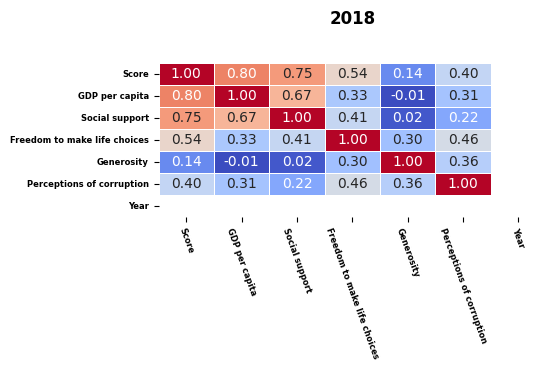

In [191]:
plt.figure(figsize=(5,2)) # Adjust the figure size for better readability
sns.heatmap(
full_corr_18,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=False,
    linewidths=.5)
plt.xticks(fontsize=6, rotation=-70,
    fontweight='bold')
plt.yticks(fontsize=6, fontweight='bold')
plt.title('2018', fontsize='12',
    loc='center',fontweight='bold',y=1.2)


Text(0.5, 1.2, '2018')

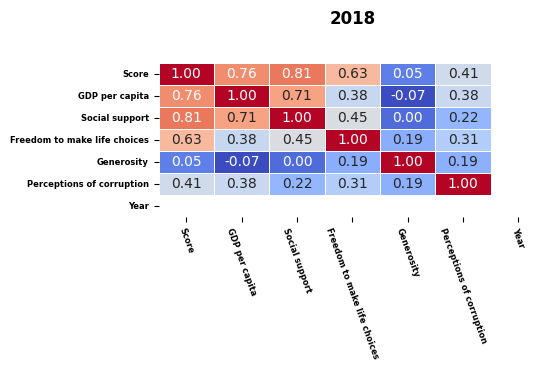

In [192]:
plt.figure(figsize=(5,2)) # Adjust the figure size for better readability
sns.heatmap(
full_corr_24,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=False,
    linewidths=.5)
plt.xticks(fontsize=6, rotation=-70,
    fontweight='bold')
plt.yticks(fontsize=6, fontweight='bold')
plt.title('2018', fontsize='12',
    loc='center',fontweight='bold',y=1.2)

Text(0.5, 1.2, '2018')

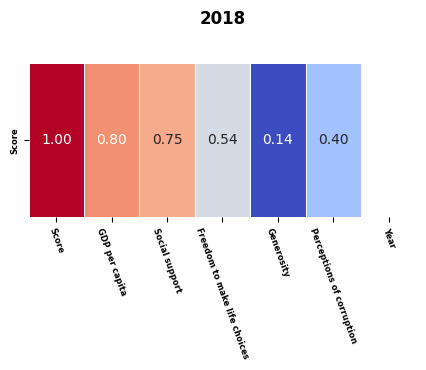

In [193]:
plt.figure(figsize=(5,2)) # Adjust the figure size for better readability
sns.heatmap(
score_corr_18,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=False,
    linewidths=.5)
plt.xticks(fontsize=6, rotation=-70,
    fontweight='bold')
plt.yticks(fontsize=6, fontweight='bold')
plt.title('2018', fontsize='12',
    loc='center',fontweight='bold',y=1.2)



### corr_2024=numeric_only_2024.corr()

Text(0.5, 1.2, '2024')

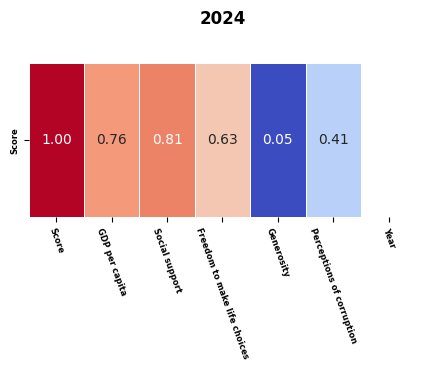

In [194]:
plt.figure(figsize=(5,2)) # Adjust the figure size for better readability
sns.heatmap(
score_corr_24,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    cbar=False,
    linewidths=.5)
plt.xticks(fontsize=6, rotation=-70,
    fontweight='bold')
plt.yticks(fontsize=6, fontweight='bold')
plt.title('2024', fontsize='12',
    loc='center',fontweight='bold',y=1.2)

In [195]:
fig=px.scatter(df_2018, x="GDP per capita", y="Score", title="2018", color="GDP per capita", trendline='ols', hover_data='Freedom to make life choices')
fig.update_layout(title_x=0.5)
fig.show()

In [196]:
fig=px.scatter(df_2024, x="GDP per capita", y="Score", title="2024", color="GDP per capita", trendline="ols")
fig.update_layout(title_x=0.5)
fig.show()

Text(0, 0.5, 'Generosity')

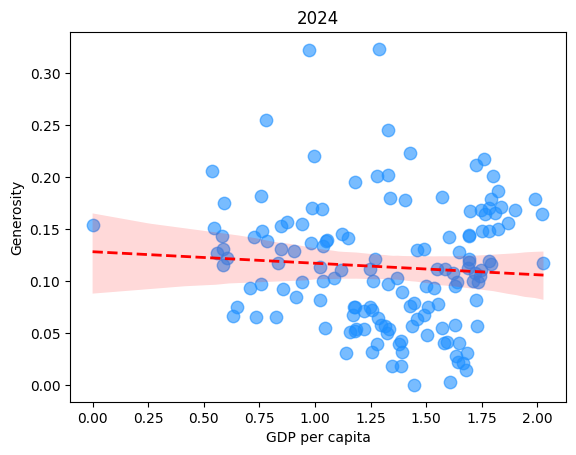

In [197]:
sns.regplot(
    x=df_2024['GDP per capita'],
    y=df_2024['Generosity'],
    color='dodgerblue',
    scatter_kws={'s': 80, 'alpha': 0.6},
    line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2},
    ci=99
)

# Add titles and labels for clarity
plt.title('2024')
plt.xlabel('GDP per capita')
plt.ylabel('Generosity')

In [ ]:
sns.regplot(
    x=df_2018['GDP per capita'],
    y=df_2018['Generosity'],
    color='dodgerblue',
    scatter_kws={'s': 80, 'alpha': 0.6},
    line_kws={'color': 'red', 'linestyle': '--', 'linewidth': 2},
    ci=99
)

# Add titles and labels for clarity
plt.title('2018')
plt.xlabel('GDP per capita')
plt.ylabel('Generosity')

Text(0, 0.5, 'Generosity')

In [ ]:
df_top_5_2018 = happiest_countries_2018.head(5).copy()
df_bottom_5_2018 =saddest_countries_2018.head(5).copy()
df_middle_5_2018 =middle_countries_2018.head(5).copy()

In [ ]:
df_top_10_2018 = happiest_countries_2018.head(10).copy()
df_bottom_10_2018 =saddest_countries_2018.head(10).copy()
df_middle_10_2018 =middle_countries_2018.head(10).copy()


In [ ]:
df_top_10_2024 = happiest_countries_2024.head(10).copy()
df_bottom_10_2024 =saddest_countries_2024.head(10).copy()
df_middle_10_2024 =middle_countries_2024.head(10).copy()

In [ ]:
df_top_5_2024 = happiest_countries_2024.head(5).copy()
df_bottom_5_2024 =saddest_countries_2024.head(5).copy()
df_middle_5_2024 =middle_countries_2024.head(5).copy()

In [ ]:
df_top_10_2018['Group'] = 'High score of happiness'
df_bottom_10_2018['Group'] = 'Low score of happiness'
df_middle_10_2018['Group'] = 'Middle score of happiness'

In [ ]:
df_top_10_2024['Group'] = 'High score of happiness'
df_bottom_10_2024['Group'] = 'Low score of happiness'
df_middle_10_2024['Group'] = 'Middle score of happiness'

In [ ]:
df_combined_2024_5 = pd.concat([df_top_5_2024, df_middle_5_2024, df_bottom_5_2024]).sort_values(by='Score', ascending=True)
df_combined_2024_10 = pd.concat([df_top_10_2024, df_middle_10_2024, df_bottom_10_2024]).sort_values(by='Score', ascending=True)

In [ ]:
df_combined_2018_5 = pd.concat([df_top_5_2018, df_middle_5_2018, df_bottom_5_2018]).sort_values(by='Score', ascending=True)
df_combined_2018_10 = pd.concat([df_top_10_2018, df_middle_10_2018, df_bottom_10_2018]).sort_values(by='Score', ascending=True)


In [ ]:
custom_color_map = { 'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'}

In [ ]:
df_combined_2018_5.head()

In [ ]:
fig = px.bar(
    df_combined_2018_5.sort_values(by='Social support'),
    y='Country or region',  # Primary categorical variable
    x='Social support',   # Numerical variable
    color='Group', # Secondary categorical variable for grouping
    barmode='group', # Group the bars
    title='2018',
    color_discrete_map=custom_color_map
)
custom_color_map = {'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'
}
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12         # Adjust the font size
)
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)      # Adjust the font size
fig.update_layout(title_x=0.5, title_font=dict(weight='bold',  size=24), showlegend=False)
fig.show()

In [ ]:
fig = px.bar(
    df_combined_2024_5.sort_values(by='Social support'),
    y='Country or region',  # Primary categorical variable
    x='Social support',   # Numerical variable
    color='Group', # Secondary categorical variable for grouping
    barmode='group', # Group the bars
    title='2024',
    color_discrete_map=custom_color_map
)
custom_color_map = {'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'
}
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12         # Adjust the font size
)
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)      # Adjust the font size
fig.update_layout(title_x=0.5, title_font=dict(weight='bold',  size=24), showlegend=False)
fig.show()

In [ ]:
fig=px.scatter(df_combined_2018_10, x='Country or region', y='Generosity', color='Group', title='2018', color_discrete_map=custom_color_map)
fig.update_layout(showlegend=False,title_x=0.5, title_font=dict(
        size=24, weight='bold'
    ))
fig.update_traces(marker=dict(size=10))
custom_color_map = {'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'}
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12         # Adjust the font size
)
fig.update_xaxes(
    tickangle=45 # <--- Rotate the x-axis labels
)
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)      # Adjust the font size

fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig=px.scatter(df_combined_2024_10, x='Country or region', y='Generosity', color='Group', title='2024', color_discrete_map=custom_color_map)
fig.update_layout(showlegend=False,title_x=0.5, title_font=dict(
        size=24, weight='bold'
    ))
fig.update_traces(marker=dict(size=10))
custom_color_map = {'High score of happiness': 'green',
                        'Low score of happiness': 'red',
                        'Middle score of happiness': 'lightpink'}
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12         # Adjust the font size
)
fig.update_xaxes(
    tickangle=45 # <--- Rotate the x-axis labels
)
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)      # Adjust the font size

fig.update_layout(title_x=0.5)
fig.show()

In [ ]:
fig=px.scatter(df_2018, x="Score", y="Social support", title="2018", color="GDP per capita", trendline="ols")
fig.update_layout(title_x=0.5, title_font=dict(
        size=24, 
        weight='bold'
    ))
fig.update_layout(showlegend=True)
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.show()

In [ ]:
fig=px.scatter(df_2024, x="Score", y="Social support", title="2024", color="GDP per capita", trendline="ols")
fig.update_layout(title_x=0.5, title_font=dict(
        size=24, weight='bold'
    ))
fig.update_layout(showlegend=True)
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)  # Adjust the font size
fig.show()

In [ ]:
sns.barplot(
    data=df_combined_2024_5.sort_values(by='Social support'),
    y='Country or region',
    x='Social support',
    hue='Group',
    palette=custom_color_map,    legend=False, width=0.4
)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('2024', fontweight='bold', y=1.05)
plt.show()

In [ ]:
sns.barplot(
    data=df_combined_2018_5.sort_values(by='Social support'),
    y='Country or region',
    x='Social support',
    hue='Group',
    legend=False, width=0.4, palette=custom_color_map
)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('2018', fontweight='bold', y=1.05)
plt.show()

In [ ]:
df_bottom_5_2018

In [ ]:
fig = px.violin(
    df_2018,
    x='Group',
    y='Freedom to make life choices',
    color='Group', 
    box=True, # Show a box plot inside the violin
    points='all')
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=24, weight='bold'), showlegend=False,
    title_text='2018',
    title_x=0.5, # Center the title
    xaxis_title='Happiness Group',
    yaxis_title='Freedom Score' # Set the plot background to white
)

In [ ]:
fig = px.violin(
    df_2024,
    x='Group',
    y='Freedom to make life choices',
    color='Group',
    box=True, # Show a box plot inside the violin
    points='all')
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=24, weight='bold'), showlegend=False,
    title_text='2024',
    title_x=0.5, # Center the title
    xaxis_title='Happiness Group',
    yaxis_title='Freedom Score' # Set the plot background to white
)

In [ ]:
fig = px.box(
    df_2024,
    x='Group',
    y='Perceptions of corruption',
    color='Group', # Show a box plot inside the violin
    points='all')
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=24, weight='bold'), showlegend=False,
    title_text='2024',
    title_x=0.5, # Center the title
    xaxis_title='Happiness Group',
    yaxis_title='Perception of corruption' # Set the plot background to white
)

In [ ]:
fig = px.box(
    df_2018,
    x='Group',
    y='Perceptions of corruption',
    color='Group', # Show a box plot inside the violin
    points='all')
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=24, weight='bold'), showlegend=False,
    title_text='2018',
    title_x=0.5, # Center the title
    xaxis_title='Happiness Group',
    yaxis_title='Perception of corruption' # Set the plot background to white
)

In [ ]:
fig = px.scatter(
    df_2018,
    x='Score',
    y='Perceptions of corruption',
    color='Group',
    size='Perceptions of corruption', # <--- Determines the size of the bubbles
    hover_name='Group',
    title='2018'
)
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=24, weight='bold'), showlegend=False,
    title_text='2018',
    title_x=0.5)
fig.show()

In [ ]:
df_2024.isnull().sum()

In [ ]:
df_2024.fillna({'Perceptions of corruption':df_2024['Perceptions of corruption'].mean()}, inplace=True)
df_2024.isnull().sum()

In [ ]:
df_2024.fillna({'Freedom to make life choices':df_2024['Freedom to make life choices'].mean()}, inplace=True)
df_2024.isnull().sum()

In [ ]:
fig = px.scatter(
    df_2024,
    x='Score',
    y='Perceptions of corruption',
    color='Group',
    size='Perceptions of corruption', # <--- Determines the size of the bubbles
    hover_name='Group',
    title='2024'
)
fig.update_xaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)        # Adjust the font size
fig.update_yaxes(
    tickfont_weight='bold',  # Make the numbers bold
    tickfont_size=12)
fig.update_layout(title_font=dict(size=24, weight='bold'), showlegend=False,
    title_text='2024',
    title_x=0.5)

fig.show()

In [ ]:
df_2018.groupby('Country or region').agg(count=('Country or region', 'count'), freedom_mean =('Freedom to make life choices','min'))

In [ ]:
df_2018.groupby('Group').agg(freedom=('Freedom to make life choices', 'min'))

In [ ]:
df_2024.groupby('Group').agg(freedom=('Freedom to make life choices', 'min'))